1) https://github.com/parrt/dtreeviz

2) https://explained.ai/decision-tree-viz/index.html

In [ ]:
!pip install -U dtreeviz

In [2]:
import dtreeviz
from dtreeviz import trees
import graphviz.backend as be

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris, load_boston

from IPython.display import Image, display_svg, SVG

In [3]:
import warnings

warnings.filterwarnings(action="ignore")

In [4]:
print("dtreevis version", dtreeviz.__version__)
print("sklearn version", sklearn.__version__)
print("numpy version", sklearn.__version__)

# dtreevis version 2.0.0
# sklearn version 1.2.0
# numpy version 1.0.2

dtreevis version 2.0.0
sklearn version 1.0.2
numpy version 1.0.2


In [5]:
df = load_iris()

X_train = df.data
y_train = df.target

In [6]:
X_train.shape

(150, 4)

In [7]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
tree1 = DecisionTreeClassifier()

In [9]:
tree1.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

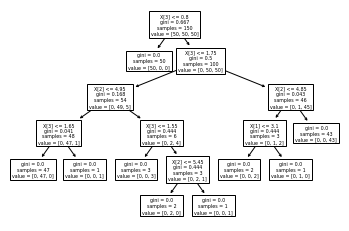

In [10]:
# Full grown decision tree

plot_tree(decision_tree=tree1)

dtreeviz_model.view(precision: int = 2, orientation: ('TD', 'LR') = 'TD', instance_orientation: ('TD', 'LR') = 'LR', show_root_edge_labels: bool = True, show_node_labels: bool = False, show_just_path: bool = False, fancy: bool = True, histtype: ('bar', 'barstacked', 'strip') = 'barstacked', highlight_path: List[int] = (0 items) [], x: numpy.ndarray = None, max_X_features_LR: int = 10, max_X_features_TD: int = 20, depth_range_to_display: tuple = None, label_fontsize: int = 12, ticks_fontsize: int = 8, fontname: str = 'Arial', title: str = None, title_fontsize: int = 10, colors: dict = None, scale=1.0)

# 1. **Classification**

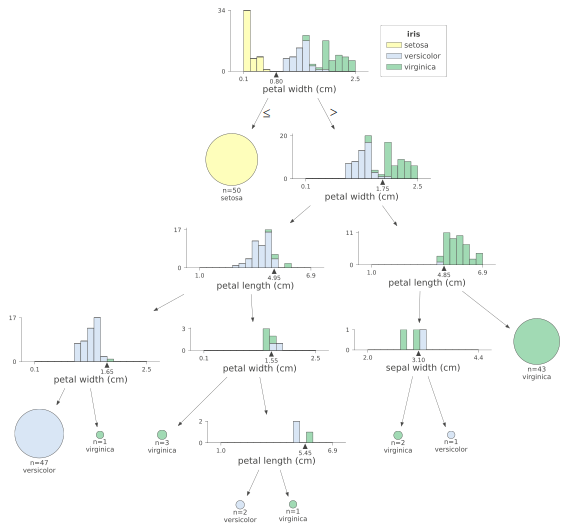

In [11]:
dtreeviz_model = dtreeviz.model(model=tree1, 
                                X_train=X_train, 
                                y_train=y_train,
                               feature_names=df.feature_names,
                               target_name="iris",
                               class_names=df.target_names)
dtreeviz_model.view()

# dtreeviz_model.save("/tmp/iris.svg")  # optionally save as svg

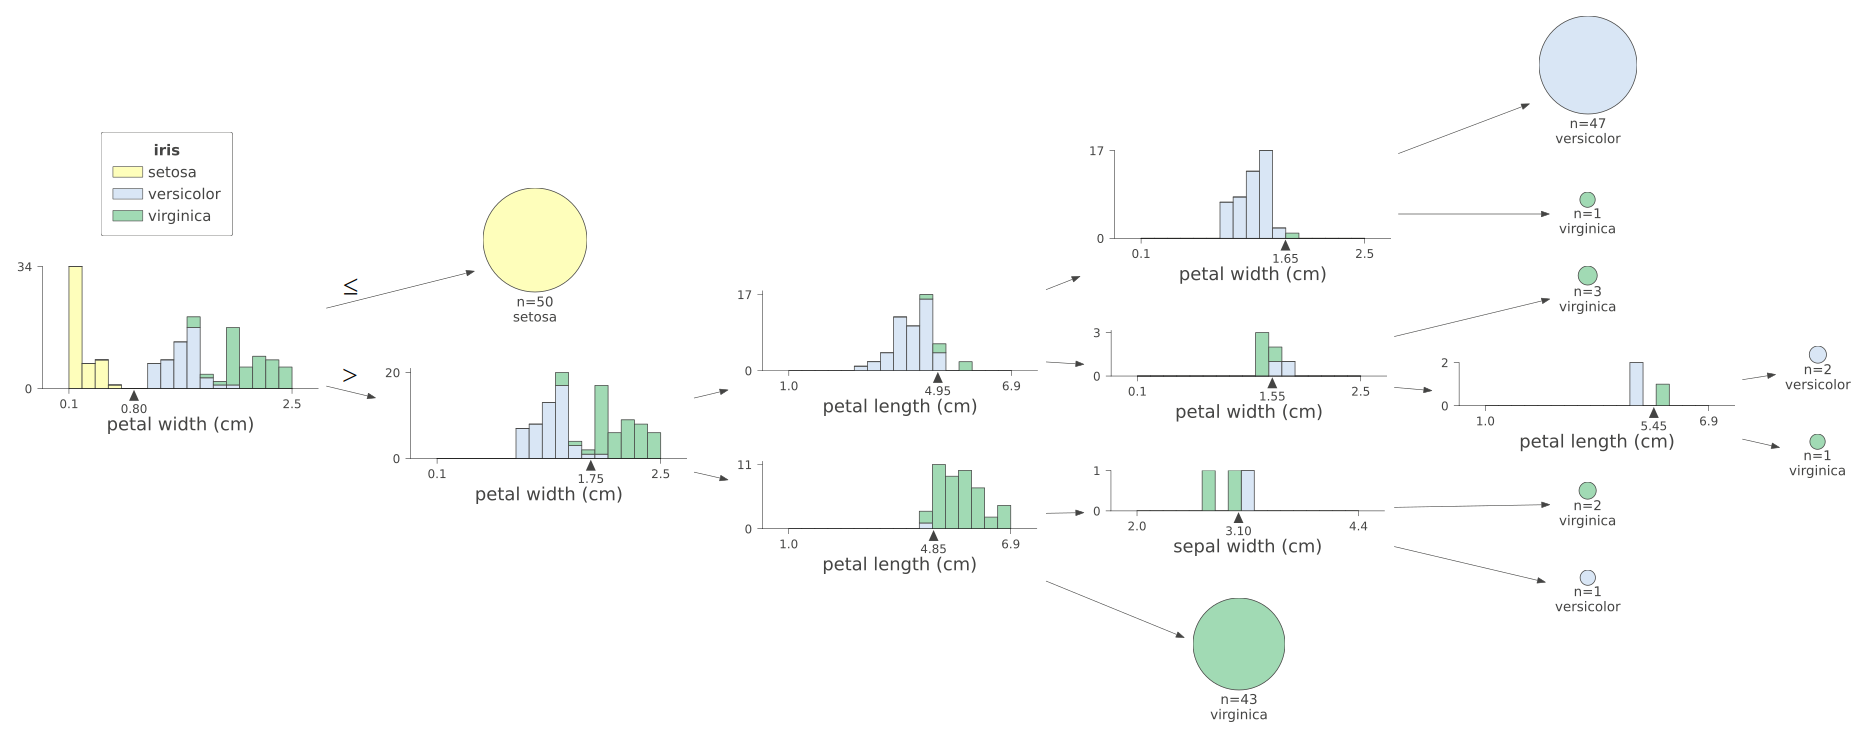

In [12]:
dtreeviz_model.view(orientation="LR", scale=2)

# **Show Prediction**

In [13]:
X = df.data[np.random.randint(0, len(df.data)),:]
X

array([6.3, 2.8, 5.1, 1.5])

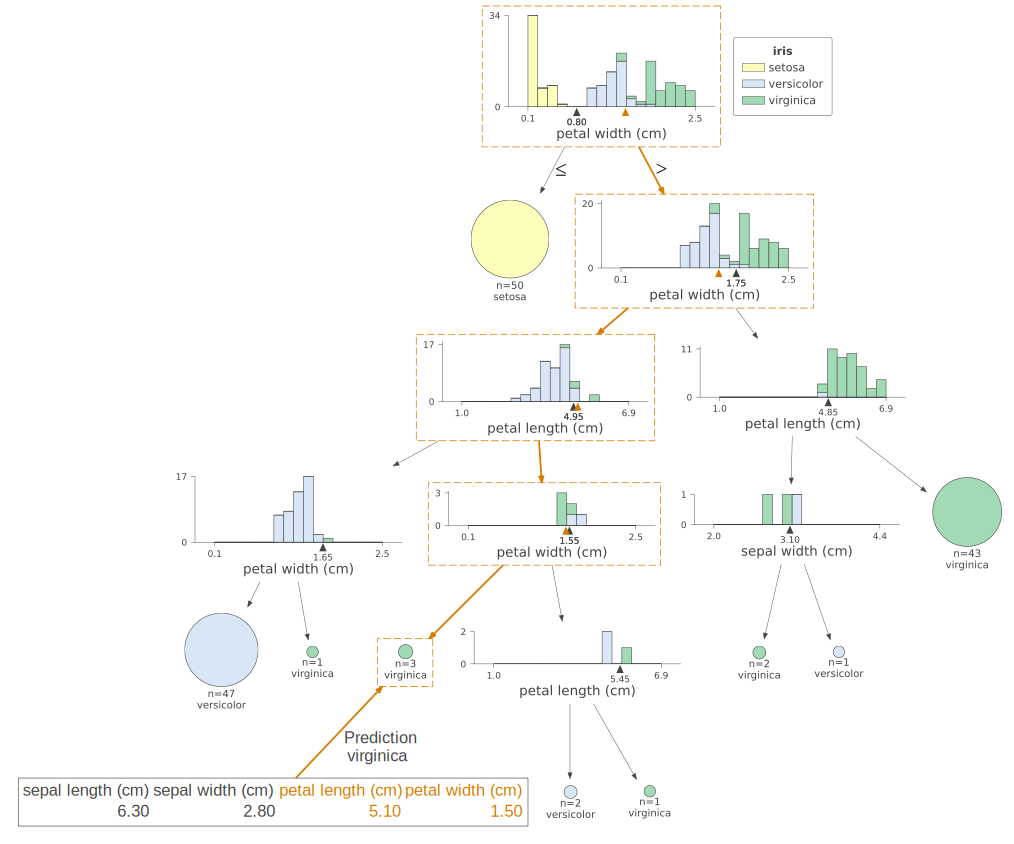

In [14]:
dtreeviz_model.view(orientation="TD", scale=1.5, x=X)

# **Show node number**

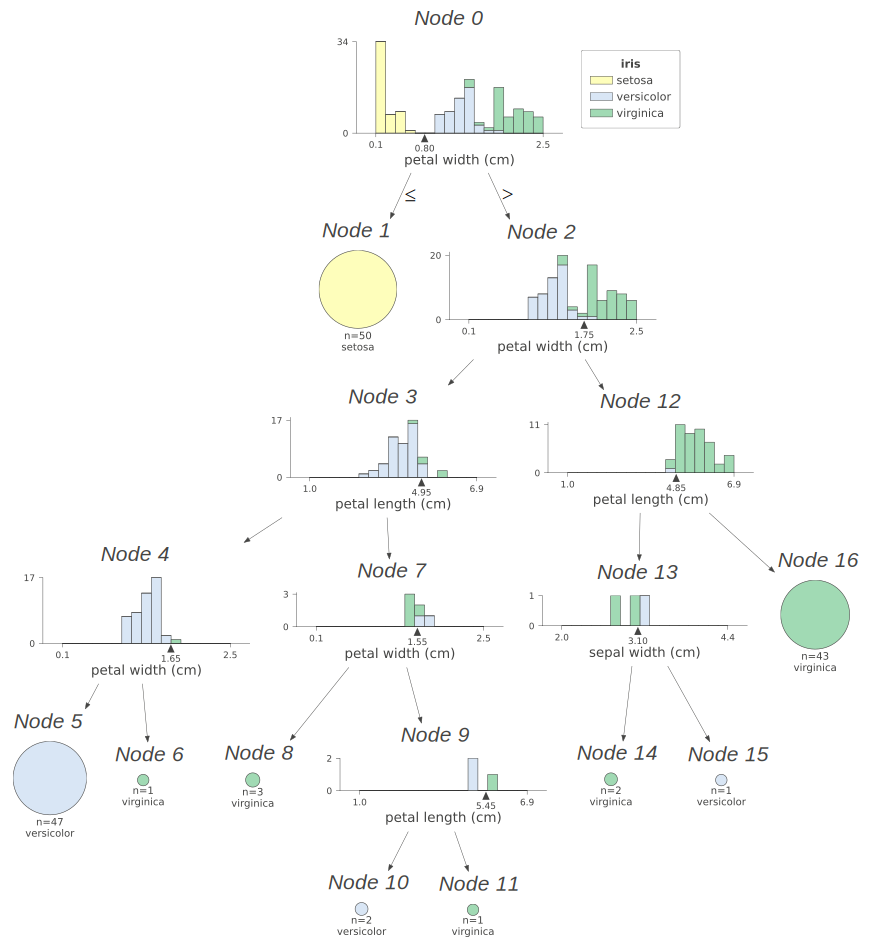

In [15]:
dtreeviz_model.view(orientation="TD", scale=1.5, show_node_labels=True)

# **Without Any graphs**

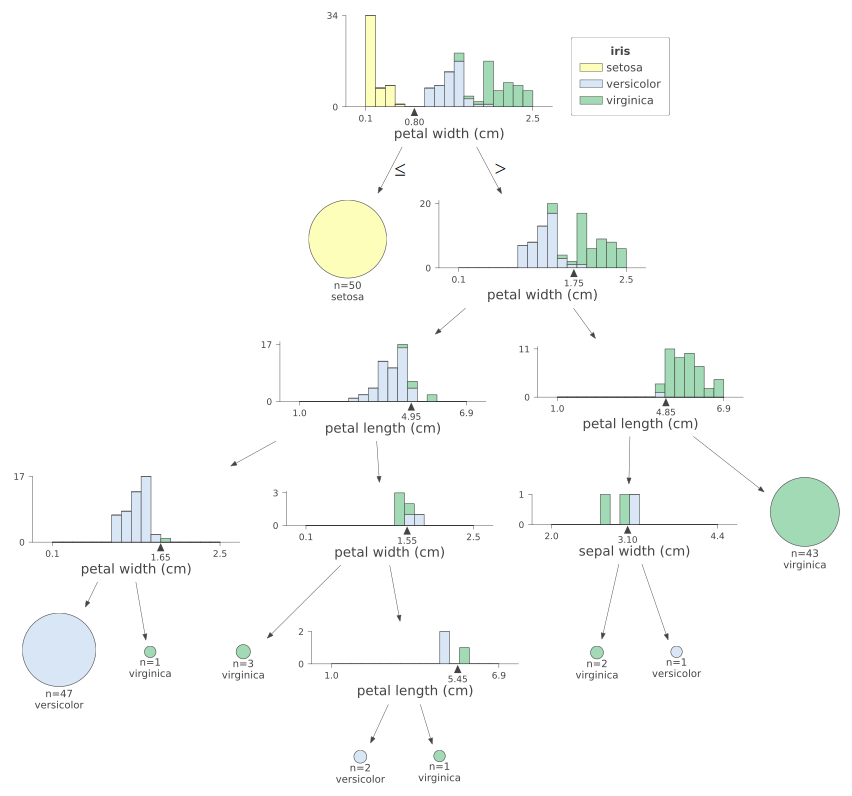

In [16]:
dtreeviz_model.view(orientation="TD", scale=1.5, histtype="barstacked")

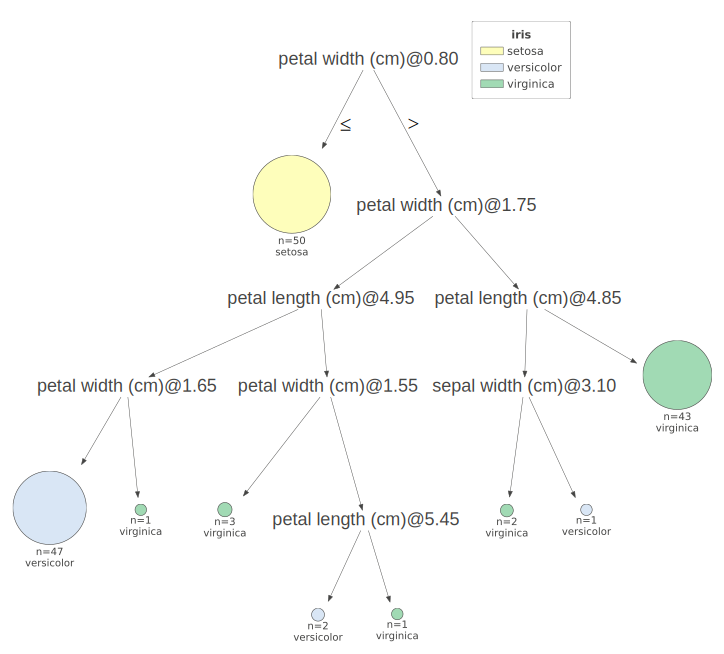

In [17]:
dtreeviz_model.view(orientation="TD", scale=1.5, histtype="barstacked", fancy=False)

# **Show just prediction path, nothing else**

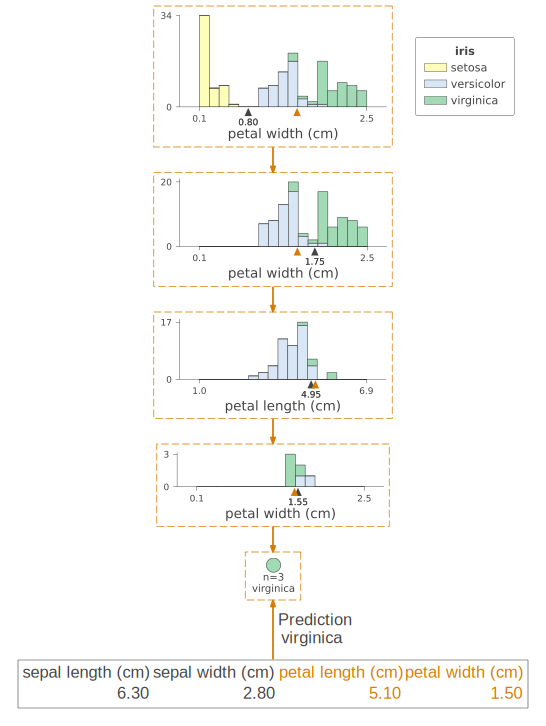

In [18]:
dtreeviz_model.view(orientation="TD", scale=1.5, show_just_path=True, x=X)

# **Prediction Path in Plain english**

In [19]:
print(dtreeviz.explain_prediction_path(tree_model=tree1, x=X,
                                 X_train=X_train, 
                                 y_train=y_train,
                                 feature_names=df.feature_names,
                                 target_name="iris",
                                 class_names=df.target_names,
                                 explanation_type="plain_english"))

4.95 <= petal length (cm) 
0.8 <= petal width (cm)  < 1.55



# **Feature Importance**

None


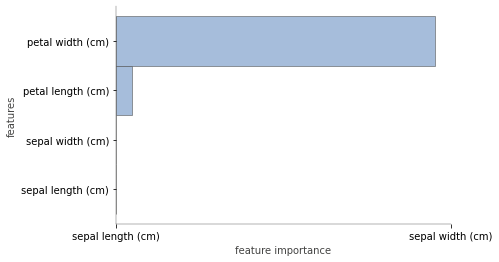

In [20]:
print(dtreeviz.explain_prediction_path(tree_model=tree1, x=X,
                                 X_train=X_train, 
                                 y_train=y_train,
                                 feature_names=df.feature_names,
                                 target_name="iris",
                                 class_names=df.target_names,
                                 explanation_type="sklearn_default"))

# 2. **Regression**

In [23]:
boston = load_boston()

X_train = boston.data
y_train = boston.target

In [24]:
tree2 = DecisionTreeRegressor(max_depth=1)
tree2.fit(X=X_train, y=y_train)

DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.25, 0.25, 'squared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.75, 0.25, 'squared_error = 79.729\nsamples = 76\nvalue = 37.238')]

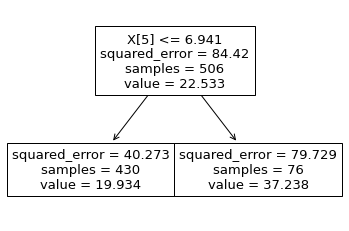

In [25]:
plot_tree(decision_tree=tree2)

In [26]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [27]:
model2 = dtreeviz.model(model=tree2,
                        X_train=X_train,
                        y_train=y_train,
                        feature_names=boston.feature_names,
                        target_name="price")

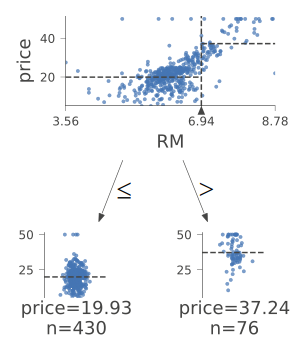

In [28]:
model2.view(scale=2)

#  **Univariate Regression**

In [29]:
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/cars.csv"

df_cars = pd.read_csv(dataset_url)

df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


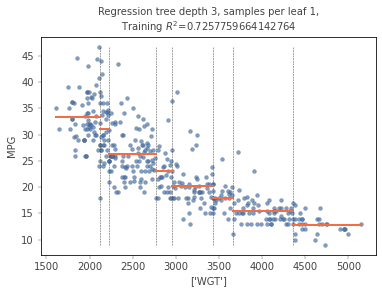

In [30]:
X, y = df_cars[['WGT']], df_cars['MPG']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")

dt.fit(X, y)

fig = plt.figure()

ax = fig.gca()

dtreeviz.rtreeviz_univar(tree_model=dt, X_train=X, y_train=y, feature_names='WGT', target_name='MPG', ax=ax)

plt.show()

# **3-D Regression**

In [31]:
from mpl_toolkits.mplot3d import Axes3D

In [32]:
X = df_cars[['WGT','ENG']]
y = df_cars['MPG']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

DecisionTreeRegressor(criterion='mae', max_depth=3)

In [33]:
X

,WGT,ENG
0,3504,307.0
1,3693,350.0
2,3436,318.0
3,3433,304.0
4,3449,302.0
...,...,...
387,2790,140.0
388,2130,97.0
389,2295,135.0
390,2625,120.0


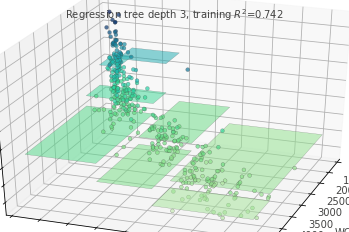

In [34]:
viz_rmodel = dtreeviz.model(dt, X, y,
                           feature_names=["WGT", "ENG"],
                           target_name='MPG')

viz_rmodel.rtree_feature_space3D(fontsize=10,
                        elev=30, azim=20, 
                        show={'splits','title'},
                        colors={'tesselation_alpha':.5})